In [1]:
import os

os.chdir('/opt/ml/P-Stage/1-STAGE/')

from PIL import Image

import wandb
import torch
import pandas as pd
import torch.nn as nn

import matplotlib.pyplot as plt
from sklearn.metrics import (
    f1_score,
    recall_score,
    accuracy_score,
    precision_score,
    confusion_matrix,

)

from config import get_args
from prepare import get_dataloader, get_transforms, get_classes
from predict import load_models
from metrics import (
    FocalLoss,
    change_2d_to_1d,
    calulate_18class,
    tensor_to_numpy,
    tensor_images_to_numpy_images,
)

args = get_args()
args.device = "cuda:0" if torch.cuda.is_available() else "cpu"

models = load_models(args)
keys = ['mask', 'gender', 'age']

args.test = False
args.train_key = "age"

_, dataloader = get_dataloader(args)

In [26]:
import numpy as np
import seaborn as sns
from predict import get_all_datas

In [3]:
model = models[2]
_, labels, preds = get_all_datas(args, models[2], dataloader, argmax=True)

In [13]:
labels, preds = tensor_to_numpy(labels), tensor_to_numpy(preds)

In [14]:
len(preds)

9450

In [5]:
preds.sum()

tensor(5639., device='cuda:0')

In [22]:
len(np.where(labels != preds)[0])

1201

In [24]:
len(labels[np.where(labels != preds)])

1201

In [25]:
# ['gender', 'age', 'mask']

fancy_idx = np.where(labels != preds)[0]
mask_outs = []

dataloader.dataset.label_idx = 2
for false_idx in fancy_idx:
    mask_outs.append(dataloader.dataset._get_label(false_idx))

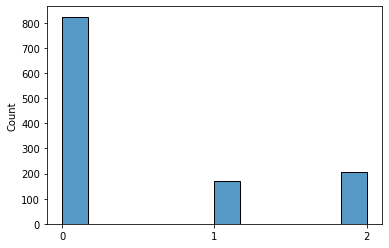

In [31]:
plt.xticks([0, 1, 2])
sns.histplot(mask_outs)